In [1]:
# 6.00.2x Problem Set 2: Simulating robots

import math
import random

import ps2_visualize
import pylab

##################
## Comment/uncomment the relevant lines, depending on which version of Python you have
##################

# For Python 3.5:
#from ps2_verify_movement35 import testRobotMovement
# If you get a "Bad magic number" ImportError, you are not using Python 3.5 

# For Python 3.6:
from ps2_verify_movement36 import testRobotMovement
# If you get a "Bad magic number" ImportError, you are not using Python 3.6


# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)




In [2]:
# === Problem 1
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """
        self.width = width
        self.height = height
        self.tiles_total = []
        self.tiles_clean = []
        for i in range(0,self.width):
            for j in range(0,self.height):
                self.tiles_total.append([i,j])
        
    
    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        x = math.floor(pos.getX())
        y = math.floor(pos.getY())
        x = int(x)
        y = int(y)
        
        if not self.isTileCleaned(x,y):
            self.tiles_clean.append([x,y])
        
        

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """
        return [m,n] in self.tiles_clean
        
    
    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        count = 0
        for i in self.tiles_total:
            count += 1
        return count
        

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        count = 0
        for i in self.tiles_clean:
            count += 1
        return count
        

    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        x = int(random.randint(0,self.width-1))
        y = int(random.randint(0,self.height-1))
        return Position(x,y)
        

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        x = int(math.floor(pos.getX()))
        y = int(math.floor(pos.getY()))
        return [x,y] in self.tiles_total
        




In [3]:
# === Problem 2
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.speed = speed
        self.room = room
        self.angle = random.randint(0,359)
        self.position = Position(random.randint(0,room.width),random.randint(0,room.height))
        
        self.room.cleanTileAtPosition(self.position)

    def getRobotPosition(self):
        """
        Return the position of the robot.

        returns: a Position object giving the robot's position.
        """
        return self.position
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.

        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.angle

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.

        position: a Position object.
        """
        self.position = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.

        direction: integer representing an angle in degrees
        """
        self.angle = direction

    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!


In [6]:
# === Problem 3
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall, it *instead* chooses a new direction
    randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        
        temp = self.position.getNewPosition(self.angle, self.speed)
        while(temp.getX()>self.room.width or temp.getY()>self.room.height or temp.getX()<0 or temp.getY()<0):
            self.setRobotDirection(random.randint(0,359))
            temp = self.position.getNewPosition(self.angle, self.speed)
        self.position = temp
        self.room.cleanTileAtPosition(self.position)

# Uncomment this line to see your implementation of StandardRobot in action!
#testRobotMovement(StandardRobot, RectangularRoom)




In [7]:
# Enter your code for runSimulation in this box.
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    
    
    trials = num_trials
    time_save = [] 
    
    while(trials>0):
        time = 0
        robot_list = []
        room = RectangularRoom(width,height)
        num_cover = room.getNumTiles()*min_coverage
        if math.floor(num_cover)<num_cover:
            num_cover = math.floor(num_cover)+1
        
        for i in range(num_robots):
            robot_list.append(robot_type(room,speed))
        for i in robot_list:
            room.cleanTileAtPosition(i.getRobotPosition())
        
        while(room.getNumCleanedTiles() < num_cover):
            for i in robot_list:
                i.updatePositionAndClean()
                room.cleanTileAtPosition(i.getRobotPosition())
            time += 1
        time_save.append(time)
        trials -=1
    
    count = 1
    for i in time_save:
        count += i
    return count/float(num_trials)

# Uncomment this line to see how much your simulation takes on average
print(runSimulation(1, 1.0, 10, 10, 0.75, 30, StandardRobot))      
        

150.7


In [9]:

# === Problem 5
class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        temp = self.position.getNewPosition(self.angle, self.speed)
        while(temp.getX()>self.room.width or temp.getY()>self.room.height or temp.getX()<0 or temp.getY()<0):
            self.setRobotDirection(random.randint(0,359))
            temp = self.position.getNewPosition(self.angle, self.speed)
        self.position = temp
        self.room.cleanTileAtPosition(self.position)
        self.setRobotDirection(random.randint(0,359))


def showPlot1(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print("Plotting", num_robots, "robots...")
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

    
def showPlot2(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300//width
        print("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(runSimulation(2, 1.0, width, height, 0.8, 200, StandardRobot))
        times2.append(runSimulation(2, 1.0, width, height, 0.8, 200, RandomWalkRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


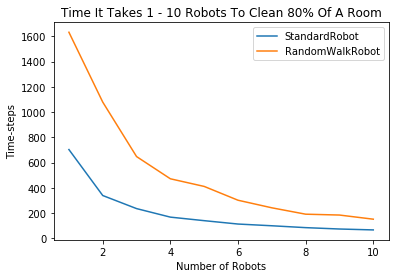

In [10]:
showPlot1('Time It Takes 1 - 10 Robots To Clean 80% Of A Room', 'Number of Robots', 'Time-steps')

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 20 by height: 15
Plotting cleaning time for a room of width: 25 by height: 12
Plotting cleaning time for a room of width: 50 by height: 6


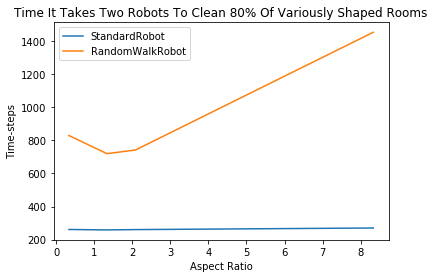

In [11]:
showPlot2('Time It Takes Two Robots To Clean 80% Of Variously Shaped Rooms', 'Aspect Ratio', 'Time-steps')